1.1.2. Напишите модуль для нахождения НОД числа 8 и
заданного 10-значного числа, не используя арифметические
операции, но с использованием функций пользователя.

In [1]:
def gcd_8(n: int) -> int:
    # преобразуем в двоичную строку
    b = bin(n)[2:]  
    
    if b.endswith("000"):
        return 8
    elif b.endswith("00"):
        return 4
    elif b.endswith("0"):
        return 2
    else:
        return 1



N = 1000000000
print(gcd_8(N)) 

8


1.2.1. Создайте произвольный двухуровневый список из целых,
вещественных и комплексных чисел. Выберите из него только
комплексные числа и запишите их в кортеж.

In [ ]:
#Создал двухуровленый список(матрица)
matrix = [
    [1, 2.9, 1 + 2j],
    [5, 8.7, 3j],
    [1 + 0j, 1, 1.3]
]
#Выбор комплексных чисел в кортеже
complex_num = tuple(
    x
    for row in matrix
    for x in row
    if isinstance(x, complex)
)

print(matrix)
print(complex_num)

1.2.2. Создайте множество из 100 первых элементов
последовательности частичных сумм ряда Фибоначчи. Выведите
число значащих цифр у элемента последовательности с заданным
номером.

In [1]:
n = int(input("Введите элемент: "))
m = int(input("Введите номер элемента: "))

#ПРограмма ряда Фибоначии
f1 = f2 = 1
print(f1, f2, end =' ')

#Частичная сумма - это сумма всех элементов ряда Фибоначчи
sum_el = [f1, f1 + f2]

i = 2
#Храним текущий элемент
current_el = f1 + f2
while i < n:
    f1, f2 = f2, f1 + f2
    print(f2, end =' ')
    current_el += f2
    #Добавляем текущий элемент в конец списка
    sum_el.append(current_el)
    i += 1
print("\nЧастичные суммы: ", sum_el)

#Номер элемента последовательности
if 1 <= m <= len(sum_el):
    element = sum_el[m - 1]
    digit = len(str(element))
    print(f"{m}-й элемент частичных сумм = {element}")
    print(f" Количество цифр: {digit}")
else:
    print("Элемент не найден")

1 1 2 3 5 8 13 21 34 55 
Частичные суммы:  [1, 2, 4, 7, 12, 20, 33, 54, 88, 143]
6-й элемент частичных сумм = 20
 Количество цифр: 2


1.3.1. Создайте короткий скрипт, находящий все нули заданной
алгебраической функции на заданном интервале (переменная
формата float).

In [ ]:
# Исходная функция
import math
def f(x):
    return math.sin(x)

# Метод дихотомии
def dichotomy(a, b, epsilon=0.00001):
    if f(a) * f(b) > 0:
        return None 
    while abs(b - a) > epsilon:
        c = (a + b) / 2
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2

# Интервал поиска
x1 = -20
x2 = 20
step = 0.4
roots = []

x = x1
while x < x2:
    root = dichotomy(x, x + step)
    if root is not None:         
        root = round(root, 3)    #Окруляем до 3 знаков
        if root not in roots:    
            roots.append(root)
    x += step

print("Корни:", roots)


1.3.3. Скачайте любую статью (например, с Habr.ru) и сформируйте из нее строку. Посчитайте частотности для всех слов,
содержащихся в ней.

In [ ]:
from newspaper import Article
import string
import pymorphy3
from collections import Counter
import re

#Инициалищируем анализатор
analizator = pymorphy3.MorphAnalyzer()

url = 'https://habr.com/ru/companies/selectel/articles/946726/'


article = Article(url)

article.download()
article.parse()

text = article.text

#Функция для примедения к нормальной форме
def lemmatizator(text):
    #Чиста от знаков приминания
    clean_text = re.sub(r'[^\w\s]', '', text.lower())
    words = clean_text.split()
    #Приведение каждого слова
    lemmatized = []
    for word in words:
        if word and len(word) > 2:
            parsed = analizator.parse(word)[0]
            lemmatized.append(parsed.normal_form)
    return lemmatized
lemmatixed_words = lemmatizator(text)
#Частности
word_freq = Counter(lemmatixed_words)

print("=" * 60)
print("Заголовок")
print(article.title)
print("\n" + "=" * 60)
print("Топ 10 самых частых слов")
print("=" * 60)
for word, count in word_freq.most_common(10):
    print(f"{word}: {count}")
print("\n" + "=" * 60)
print(f"Всего уникальных слов: {len(word_freq)}")


print(f"Всего слов в тексте: {len(lemmatixed_words)}")

1.4.1. Создайте множество из случайных натуральных чисел размером в 10000 элементов. Осуществите из него случайную выборку 10 элементов без возвращения, 
а затем с возвращением, не используя методы sample и choice. Зафиксируйте время выполнения. 
Сделайте то же самое с использованием указанных методов модуля random и сравните скорости выполнения.

In [ ]:
import random
import time

# Множество из случайных чисел
my_nums = {random.randint(1, 10000) for _ in range(10000)}
nums = list(my_nums)

#Без sample choise
start = time.perf_counter()
for _ in range(100000):  # повторим 10000 раз
    chosen_not_return = []
    used = set()
    while len(chosen_not_return) < 10:
        idx = random.randint(0, len(nums) - 1)
        if idx not in used:
            chosen_not_return.append(nums[idx])
            used.add(idx)

     #В возвращением       
    chosen_with_return = []
    for _ in range(10):
        idx = random.randint(0, len(nums) - 1)
        chosen_with_return.append(nums[idx])
end = time.perf_counter()
time_o = end - start

#С sampe choise
start = time.perf_counter()
for _ in range(100000):
    chosen_not_return_c = random.sample(nums, 50)
    chosen_with_return_c = [random.choice(nums) for _ in range(10)]
end = time.perf_counter()
time_L = end - start

print("Без использования sample/choice: ", time_o, "секунд")
print("Используя sample/choice: ", time_L, "секунд")


1.4.3. Создайте класс Frac, типичный экземпляр которого является обыкновенной дробью. Опишите методы обращения,
сложения и умножения.

In [1]:
import math
#Класс для работы с дробью
class Frac:
    def __init__(self, numerator, denominator):
        if denominator == 0:
            raise ValueError("Знаменатель не может равняться нулю!")
        
        self.numerator = numerator
        self.denominator = denominator
        self._reduce()
    
    #Сокращение дробей
    def _reduce(self):
        g = math.gcd(self.numerator, self.denominator)
        self.numerator //= g
        self.denominator //= g
        if self.denominator < 0:
            self.numerator = -self.numerator
            self.denominator = -self.denominator
    #вывод в виде дроби
    def __str__(self):
        if self.denominator == 1:
            return str(self.numerator)
        return f"{self.numerator}/{self.denominator}"
    
    #Функция для возврата обратной дроби
    def inverse(self):
        if self.numerator == 0:
            raise ZeroDivisionError("Нельзя обратить нулевую дробь!")
        return Frac(self.denominator, self.numerator)
    
    #Словжение дробей
    def __add__(self, other):
        if not isinstance(other, Frac):
            other = Frac(other)
        new_numerator = self.numerator * other.denominator + self.denominator * other.numerator
        new_denominator = self.denominator * other.denominator
        return Frac(new_numerator, new_denominator)
    #Умножение дробей
    def __mul__(self, other):
        if not isinstance(other, Frac):
            other = Frac(other)
        new_numerator = self.numerator * other.numerator
        new_denominator = self.denominator * other.denominator
        return Frac(new_numerator, new_denominator)
    

a = Frac(2, 3)
b = Frac(3, 4)
print("a = ", a)
print("b = ", b)
print("a + b = ", a + b)
print("a * b = ", a * b)
print("inverse(a) = ", a.inverse())

a =  2/3
b =  3/4
a + b =  17/12
a * b =  1/2
inverse(a) =  3/2


1.5.1. Постройте графики стандартного отклонения температур по месяцам года для Москвы и Анадыря, пользуясь данными
Gismeteo (https://www.gismeteo.ru/diary).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def main(file):
    #Загрузка данных
    df = pd.read_csv(file, header=None, names=['date', 'temperature'], encoding='cp1251', sep=';', usecols=[0, 1])
    
    #Обработка температур
    df['temperature'] = pd.to_numeric(df['temperature'], errors='coerce')#Преобразуем в числа если можем
    df = df.dropna(subset=['temperature']) #Удаляем всё что не преобразовалось(мусор если он есть)
    
    #Обработка дат
    df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y %H:%M', errors='coerce')#Преобразуем числа в дату
    df = df.dropna(subset=['date']) #Удаляем всё что не преобразовалось(мусор если он есть)
    
    #Среднесуточные температуры
    df['date_only'] = df['date'].dt.date # Добавляем колонку дата БЕЗ ВРЕМЕНИ(в таблице есть несколько замеров в один день но в разное время)
    daily_avg = df.groupby('date_only')['temperature'].mean().reset_index() #Считаем средние температуры в день
    
    
    #Добавляем месяц
    daily_avg['month'] = pd.to_datetime(daily_avg['date_only']).dt.month #Добовляем колонку месяц 1-12
    
    #Стандартное отклонение по месяцам
    monthly_std = daily_avg.groupby('month')['temperature'].std().reset_index()#Стандартное отклонение по месяцам
    monthly_std.columns = ['month', 'std_deviation'] #Для удобства оставляем только колонку месяц и отколонение
    
    return monthly_std

msk = main(r'D:\IAD\Intellectual-Data-Analysis\moskov.csv')
anadyr = main(r'D:\IAD\Intellectual-Data-Analysis\anadyr.csv')

#Построение графика
plt.figure(figsize=(12, 6))
plt.plot(msk['month'], msk['std_deviation'], marker='o', label='Москва', linewidth=2, markersize=8)
plt.plot(anadyr['month'], anadyr['std_deviation'], marker='s', label='Анадырь', linewidth=2, markersize=8)

#Настройки графика
plt.title('Стандартное отклонение температур по месяцам', fontsize=14)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Стандартное отклонение (°C)', fontsize=12)
plt.xticks(range(1, 13), ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


1.5.2. Постройте три столбчатые диаграммы населения 5 стран мира (по вашему выбору) в 2000, 2010 и 2020 годах по данным
ресурса worldometer

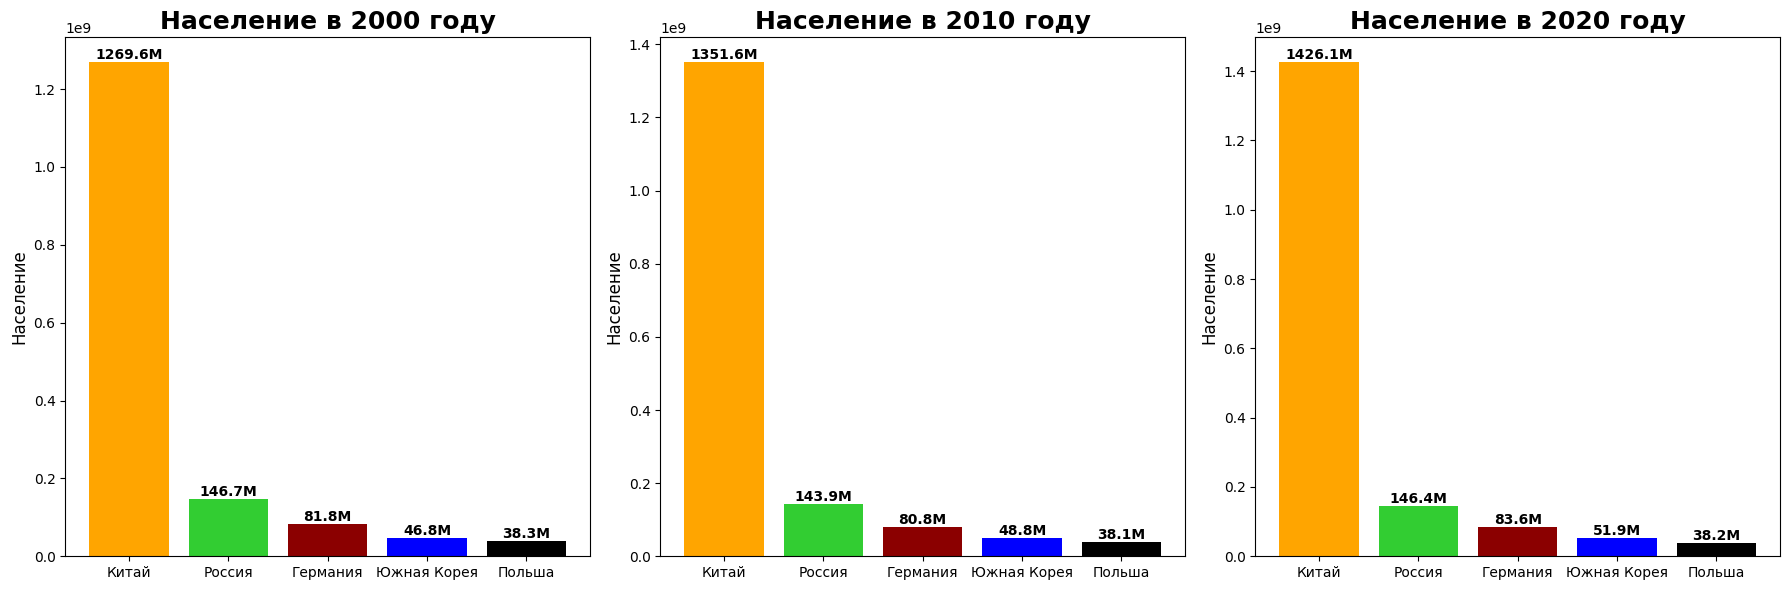

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# данные с сайта
data = {
    'country': ['Китай', 'Южная Корея', 'Россия', 'Германия', 'Польша'],
    '2000': [1269581175, 46766661, 146717783, 81797258, 38258071],
    '2010': [1351561514, 48769332, 143934465, 80830924, 38095351],
    '2020': [1426106093, 51858482, 146371299, 83628708, 38171012]
}

df = pd.DataFrame(data)

# Создание 3 отдельных графиков
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
years = ['2000', '2010', '2020']
colors = ['#FFA500', '#32CD32', '#8B0000', '#0000FF', '#000000']

# Сортировка и построение
for i, year in enumerate(years):
    sorted_data = df.sort_values(year, ascending=False)
    bars = axes[i].bar(sorted_data['country'], sorted_data[year], color=colors)
    
    axes[i].set_title(f'Население в {year} году', fontsize=18, fontweight='bold')
    axes[i].set_ylabel('Население', fontsize=12)

    # подписи на столбцах
    for bar in bars:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2, height,
                     f'{height/1e6:.1f}M',
                     ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()
